## REGRESSION FINAL EXAM:

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn import datasets

## Loading the Data

In [50]:
train= pd.read_csv("train-1.csv")
test= pd.read_csv("test-1.csv")
store= pd.read_csv("store-1.csv")

C:\Users\ASUS\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [7]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [179]:
train1= pd.merge(train, store, on= "Store", how= 'inner' )

In [180]:
test1= pd.merge(test, store, on= "Store", how= 'inner' )

In [7]:
train1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [8]:
test1.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,857,1,3,2015-09-16,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1713,1,2,2015-09-15,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,2569,1,1,2015-09-14,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,3425,1,7,2015-09-13,0.0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


#### Null Hypothesis, Ho--> The Sales of store are dependent on the parameters given.

## Understanding The Data

In [10]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
Store                        1017209 non-null int64
DayOfWeek                    1017209 non-null int64
Date                         1017209 non-null object
Sales                        1017209 non-null int64
Customers                    1017209 non-null int64
Open                         1017209 non-null int64
Promo                        1017209 non-null int64
StateHoliday                 1017209 non-null object
SchoolHoliday                1017209 non-null int64
StoreType                    1017209 non-null object
Assortment                   1017209 non-null object
CompetitionDistance          1014567 non-null float64
CompetitionOpenSinceMonth    693861 non-null float64
CompetitionOpenSinceYear     693861 non-null float64
Promo2                       1017209 non-null int64
Promo2SinceWeek              509178 non-null float64
Promo2SinceYear              509178 non-null f

In [7]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 17 columns):
Id                           41088 non-null int64
Store                        41088 non-null int64
DayOfWeek                    41088 non-null int64
Date                         41088 non-null object
Open                         41077 non-null float64
Promo                        41088 non-null int64
StateHoliday                 41088 non-null object
SchoolHoliday                41088 non-null int64
StoreType                    41088 non-null object
Assortment                   41088 non-null object
CompetitionDistance          40992 non-null float64
CompetitionOpenSinceMonth    25872 non-null float64
CompetitionOpenSinceYear     25872 non-null float64
Promo2                       41088 non-null int64
Promo2SinceWeek              23856 non-null float64
Promo2SinceYear              23856 non-null float64
PromoInterval                23856 non-null object
dtypes: float64(6), int6

There are a lot of null values in the data. Mostly in Promo2SinceWeek, Promo2SinceYear, PromoInterval, CompetitionOpenSinceYear and CompetitionOpenSinceMonth due to Promo2 being 0 for their null columns        

In [11]:
train1.shape

(1017209, 18)

In [9]:
test1.shape

(41088, 17)

In [12]:
train1.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [9]:
# Checking the percentage of missing values
round(100*(train1.isnull().sum()/len(train1.index)), 2)

Store                         0.00
DayOfWeek                     0.00
Date                          0.00
Sales                         0.00
Customers                     0.00
Open                          0.00
Promo                         0.00
StateHoliday                  0.00
SchoolHoliday                 0.00
StoreType                     0.00
Assortment                    0.00
CompetitionDistance           0.26
CompetitionOpenSinceMonth    31.79
CompetitionOpenSinceYear     31.79
Promo2                        0.00
Promo2SinceWeek              49.94
Promo2SinceYear              49.94
PromoInterval                49.94
dtype: float64

In [10]:
round(100*(test1.isnull().sum()/len(test1.index)), 2)

Id                            0.00
Store                         0.00
DayOfWeek                     0.00
Date                          0.00
Open                          0.03
Promo                         0.00
StateHoliday                  0.00
SchoolHoliday                 0.00
StoreType                     0.00
Assortment                    0.00
CompetitionDistance           0.23
CompetitionOpenSinceMonth    37.03
CompetitionOpenSinceYear     37.03
Promo2                        0.00
Promo2SinceWeek              41.94
Promo2SinceYear              41.94
PromoInterval                41.94
dtype: float64

In [14]:
train1["StoreType"][train1["Store"]==1].nunique()

1

## Univariate Analysis

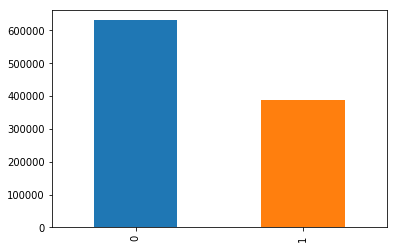

In [11]:
train1["Promo"].value_counts().plot.bar()

Stores mostly run on a no promo day(0)

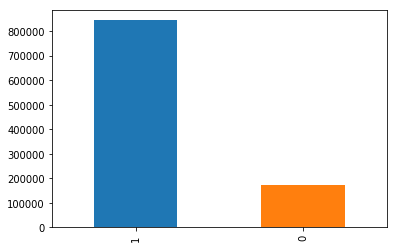

In [17]:
train1["Open"].value_counts().plot.bar()

Store was open most of the time in these 6 weeks.

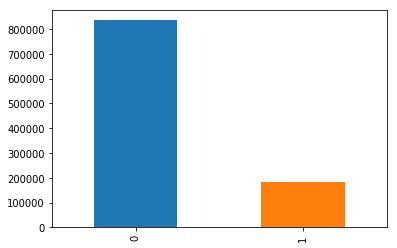

In [18]:
train1["SchoolHoliday"].value_counts().plot.bar()

There were less no. of school holidays

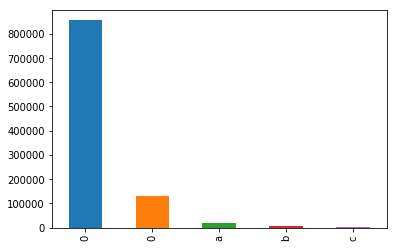

In [19]:
train1["StateHoliday"].value_counts().plot.bar()

There were very less amount of state holidays

In [181]:
train1["StateHoliday"]= train1["StateHoliday"].astype(str)

In [182]:
test1["StateHoliday"]= test1["StateHoliday"].astype(str)

In [21]:
train1["StateHoliday"].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

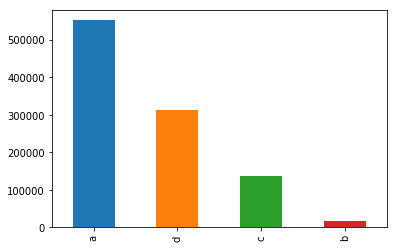

In [22]:
train1["StoreType"].value_counts().plot.bar()

Store model a was the most preffered of all the 4 different types of stores

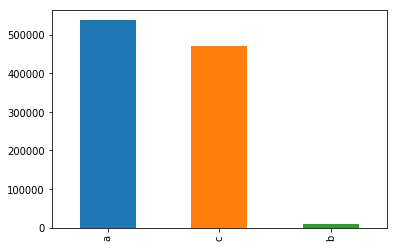

In [23]:
train1["Assortment"].value_counts().plot.bar()

Basic and Extra Assortment were the most in number

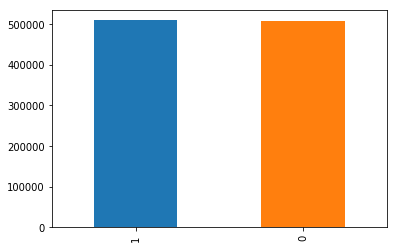

In [24]:
train1["Promo2"].value_counts().plot.bar()

All stores were equal in terms of participating and not participating consecutive promo codes

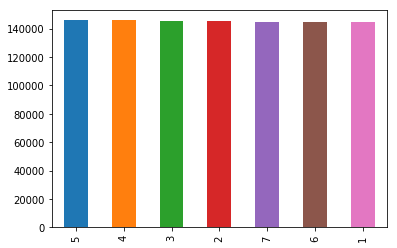

In [25]:
train1["DayOfWeek"].value_counts().plot.bar()

Days of the week are all approximately in equal proportions

In [26]:
train1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


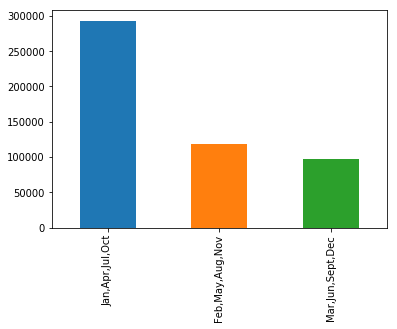

In [27]:
train1["PromoInterval"].value_counts().plot.bar()

 The months Jan, Apr, jul and Oct are more frequent in the Data

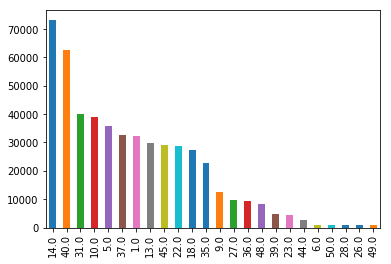

In [28]:
train1["Promo2SinceWeek"][train1["Promo2"]==1].value_counts().plot.bar()

 promo 2 since 14 and 40 weeks have the highest numbers, which tells us promo2 was mostly adopted recently.

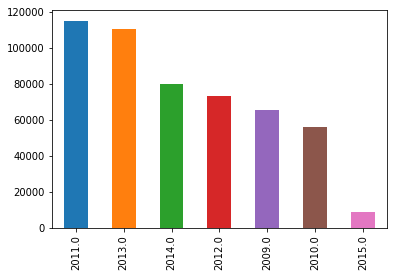

In [29]:
train1["Promo2SinceYear"][train1["Promo2"]==1].value_counts().plot.bar()

for 2011 and 2013 , most of the stores started adopting promo2

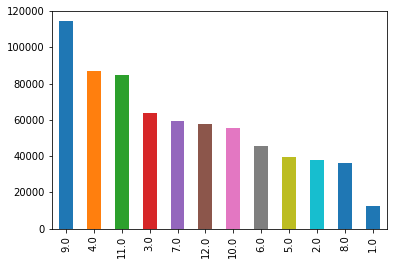

In [30]:
train1["CompetitionOpenSinceMonth"].value_counts().plot.bar()

For September month, most of the store competotors were opened

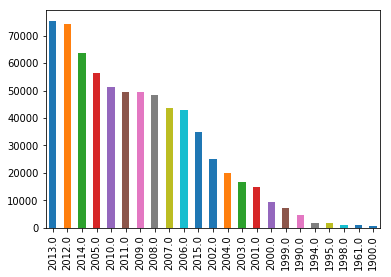

In [31]:
train1["CompetitionOpenSinceYear"].value_counts().plot.bar()

For the year 2012,2013 and 2014, most number of competitors were opened. As time passed, more and more competitor stores opened

C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


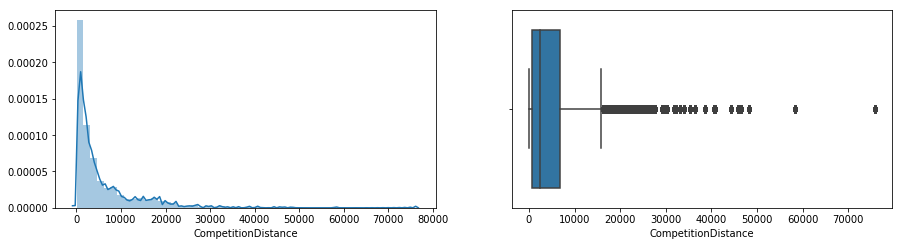

In [32]:
df1= train1["CompetitionDistance"].dropna()

plt.figure(figsize=(15,8))
plt.subplot(221)
sns.distplot(df1)

plt.subplot(222)
sns.boxplot(df1)



For the competition distance, which means at what distance the competitor s store is at is highly right skewed data, most of the stores are at smaller distances to our store

C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


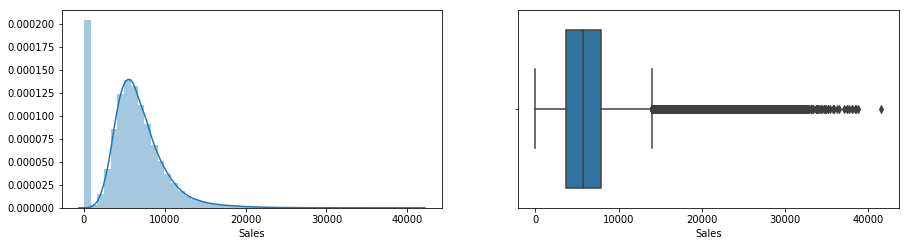

In [33]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.distplot(train1["Sales"])

plt.subplot(222)
sns.boxplot(train1["Sales"])





Sales in our store is highly right skewed and a large no. of outliers can be visualized

C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


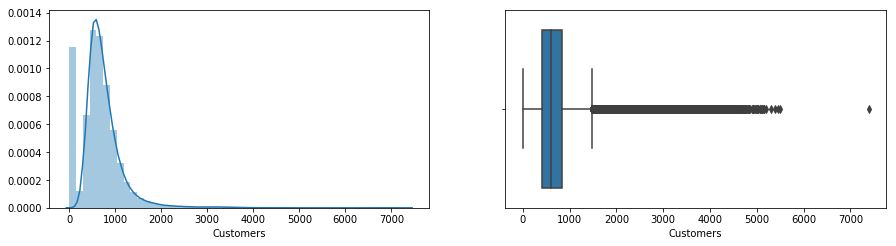

In [34]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.distplot(train1["Customers"])

plt.subplot(222)
sns.boxplot(train1["Customers"])

Here we visualized the no. of customers, the data is highly right skewed

## Bivariate Analysis

In [35]:
train1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [183]:
train1["Date"]= pd.to_datetime(train1["Date"])

In [184]:
train1['Month']=train1.Date.dt.month
train1['Year']=train1.Date.dt.year

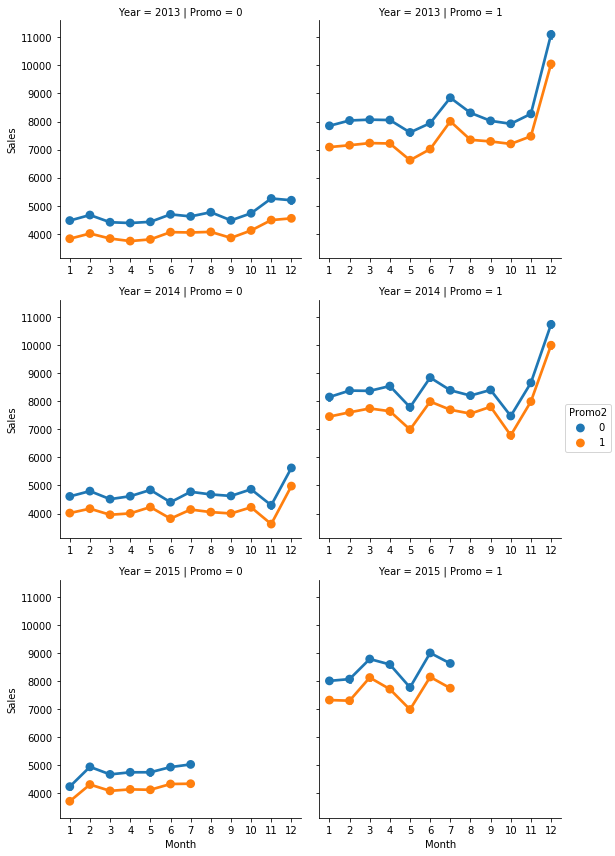

In [38]:
sns.factorplot(data = train1, x ="Month", y = "Sales", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year"
              ,sharex=False)


All three years show a similar trend wrt to promo=0 and 1. Sales are more when promo is 1

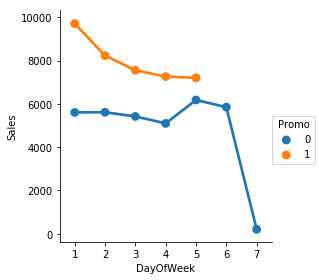

In [39]:
sns.factorplot(data = train1, x ="DayOfWeek", y = "Sales",
                hue='Promo'
              ,sharex=False)

Promo has been provided between day 1 to 5 which are most probably weekdays in our data and the sales for these days are higher than days when promo is not provided

In [40]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
Store                        1017209 non-null int64
DayOfWeek                    1017209 non-null int64
Date                         1017209 non-null datetime64[ns]
Sales                        1017209 non-null int64
Customers                    1017209 non-null int64
Open                         1017209 non-null int64
Promo                        1017209 non-null int64
StateHoliday                 1017209 non-null object
SchoolHoliday                1017209 non-null int64
StoreType                    1017209 non-null object
Assortment                   1017209 non-null object
CompetitionDistance          1014567 non-null float64
CompetitionOpenSinceMonth    693861 non-null float64
CompetitionOpenSinceYear     693861 non-null float64
Promo2                       1017209 non-null int64
Promo2SinceWeek              509178 non-null float64
Promo2SinceYear              509178 no

In [41]:
train1["Sales"].max()

41551

In [16]:
label=["Very Low ", "Low ", "Average ","Good ","Very Good"]
train1['sale_bin']=pd.cut(train1['Sales'],5, labels=label)

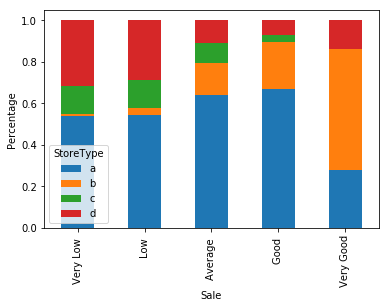

In [17]:

sale_bin=pd.crosstab(train1["sale_bin"], train1['StoreType'])
sale_bin.div(sale_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel("Sale")
P=plt.ylabel("Percentage")

Here,  we divided our sales into 5 categories, defining the peformance per store type. Store Typ B was the most in Very good Category where as Store Type c was not even present. This tells us that sales of store c are not good as its is very less in other categories of sales as well

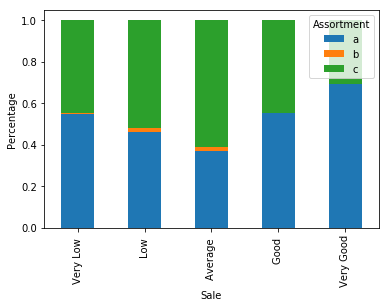

In [44]:
label=["Very Low ", "Low ", "Average ","Good ","Very Good"]
train1['sale_bin']=pd.cut(train1['Sales'],5, labels=label)

sale_bin=pd.crosstab(train1["sale_bin"], train1['Assortment'])
sale_bin.div(sale_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel("Sale")
P=plt.ylabel("Percentage")

Assortment type basic nd extra are present more in our data and work similarly in all our sales categories.

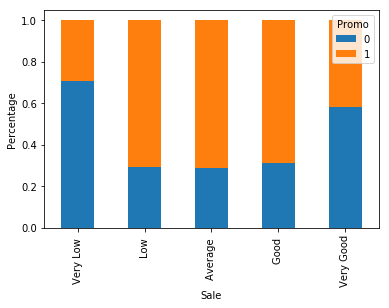

In [45]:
label=["Very Low ", "Low ", "Average ","Good ","Very Good"]
train1['sale_bin']=pd.cut(train1['Sales'],5, labels=label)

sale_bin=pd.crosstab(train1["sale_bin"], train1['Promo'])
sale_bin.div(sale_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel("Sale")
P=plt.ylabel("Percentage")

When promo is not provided our sales are very low. When promo is provided 'Low', 'Average' and 'Good' the sales trend are similar. 
But Sales in Very good performance contain mostly when promo is not provided.


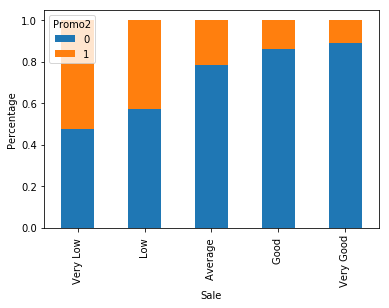

In [46]:
label=["Very Low ", "Low ", "Average ","Good ","Very Good"]
train1['sale_bin']=pd.cut(train1['Sales'],5, labels=label)

sale_bin=pd.crosstab(train1["sale_bin"], train1['Promo2'])
sale_bin.div(sale_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel("Sale")
P=plt.ylabel("Percentage")

Sales without consecutive promo are very good. When consecutive promo is provided the sales are mostly in very low and low category

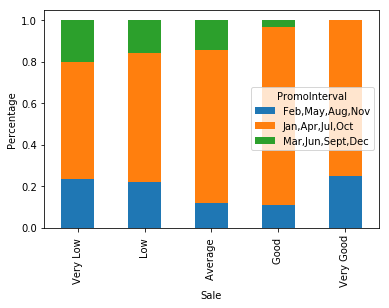

In [47]:
label=["Very Low ", "Low ", "Average ","Good ","Very Good"]
train1['sale_bin']=pd.cut(train1['Sales'],5, labels=label)

sale_bin=pd.crosstab(train1["sale_bin"], train1['PromoInterval'])
sale_bin.div(sale_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel("Sale")
P=plt.ylabel("Percentage")

Jan, Apr, Jul, Oct Interval is present mostly in all categories of Sales. Most no. of customers buy during this interval.

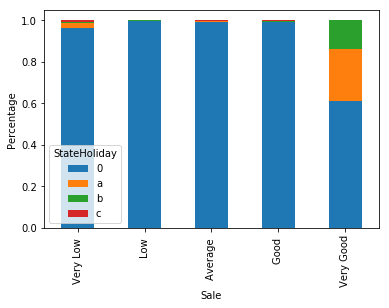

In [48]:
label=["Very Low ", "Low ", "Average ","Good ","Very Good"]
train1['sale_bin']=pd.cut(train1['Sales'],5, labels=label)

sale_bin=pd.crosstab(train1["sale_bin"], train1['StateHoliday'])
sale_bin.div(sale_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel("Sale")
P=plt.ylabel("Percentage")

 sales are in Very good category when holidays are given, otherwise the trend is similar for all sales category

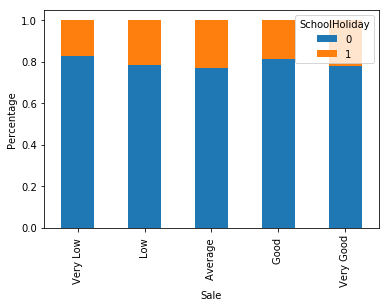

In [49]:
label=["Very Low ", "Low ", "Average ","Good ","Very Good"]
train1['sale_bin']=pd.cut(train1['Sales'],5, labels=label)

sale_bin=pd.crosstab(train1["sale_bin"], train1['SchoolHoliday'])
sale_bin.div(sale_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel("Sale")
P=plt.ylabel("Percentage")

There is a very similar trend for all the sales categories. when school holiday is not provided sales are more in percentage. Very less no. of holidays were given during this time can also be reason of sales not being in very good category

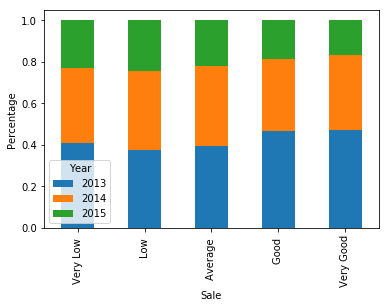

In [51]:
label=["Very Low ", "Low ", "Average ","Good ","Very Good"]
train1['sale_bin']=pd.cut(train1['Sales'],5, labels=label)

sale_bin=pd.crosstab(train1["sale_bin"], train1['Year'])
sale_bin.div(sale_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel("Sale")
P=plt.ylabel("Percentage")

Most number of sales in very good category was for 2013. Sales for 2015 were overall less in each category

In [57]:
test1.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [58]:
train1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Month', 'Year'],
      dtype='object')

## Missing Value Treatment

In [53]:
train1.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Month,Year
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774,5.846762e+00,2.013832e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870,3.326097e+00,7.773960e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000,1.000000e+00,2.013000e+03
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000,3.000000e+00,2.013000e+03
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000,6.000000e+00,2.014000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000,8.000000e+00,2.014000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000,1.200000e+01,2.015000e+03


In [11]:
test1.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000,40992.000000,25872.000000,25872.000000,41088.000000,23856.000000,23856.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487,5088.583138,7.035250,2008.641929,0.580607,24.426559,2011.820926
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802,7225.487467,3.143015,6.862400,0.493466,14.161312,1.692166
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000,720.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000,2425.000000,7.000000,2010.000000,1.000000,22.000000,2012.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000,6480.000000,9.000000,2012.000000,1.000000,37.000000,2013.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000,75860.000000,12.000000,2015.000000,1.000000,49.000000,2015.000000


In [54]:
train1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Year,sale_bin
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,7,2015,Very Low
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,7,2015,Very Low
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,7,2015,Very Low
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,7,2015,Very Low
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,7,2015,Very Low


In [17]:
test1.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,857,1,3,2015-09-16,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1713,1,2,2015-09-15,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,2569,1,1,2015-09-14,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,3425,1,7,2015-09-13,0.0,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [185]:
train1[["Promo2SinceWeek","Promo2SinceYear","PromoInterval"]]=train1[["Promo2SinceWeek","Promo2SinceYear","PromoInterval"]].fillna(0)

In [186]:
train1['CompetitionDistance'].fillna(train1['CompetitionDistance'].median(), inplace = True)

In [187]:
test1['CompetitionDistance'].fillna(test1['CompetitionDistance'].median(), inplace = True)

In [188]:
train1.CompetitionOpenSinceMonth.fillna(0, inplace = True)
train1.CompetitionOpenSinceYear.fillna(0,inplace=True)

In [189]:
test1.CompetitionOpenSinceMonth.fillna(0, inplace = True)
test1.CompetitionOpenSinceYear.fillna(0,inplace=True)

In [190]:
test1[["Promo2SinceWeek","Promo2SinceYear","PromoInterval"]]=test1[["Promo2SinceWeek","Promo2SinceYear","PromoInterval"]].fillna(0)

In [191]:
test1["Date"]= pd.to_datetime(test1["Date"])

test1['Month']=test1.Date.dt.month
test1['Year']=test1.Date.dt.year

In [192]:
test1["Open"]=test1["Open"].fillna(1)

In [170]:
train1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Month', 'Year'],
      dtype='object')

In [171]:
test1.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Month', 'Year'],
      dtype='object')

## Dummy creation

In [34]:
train1.columns'

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Month', 'Year', 'sale_bin',
       'SalesperCustomer'],
      dtype='object')

In [35]:
test1.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Month', 'Year'],
      dtype='object')

In [198]:
tr1= train1.drop(["Store", "Customers", "CompetitionOpenSinceMonth","CompetitionOpenSinceYear", "StateHoliday", "Promo2SinceYear", "Date"],1)

te1= test1.drop(["Store","Id",  "CompetitionOpenSinceMonth","CompetitionOpenSinceYear", "StateHoliday", "Promo2SinceYear", "Date"],1)

In [37]:
test1['Year'].value_counts()

2015    41088
Name: Year, dtype: int64

In [199]:
tr1.shape

(1017209, 13)

In [201]:
te1.shape

(41088, 12)

In [218]:
dummy=['StoreType','Assortment',
       'PromoInterval','DayOfWeek','SchoolHoliday']

df_encode = pd.get_dummies(data = tr1, prefix = None, columns = dummy, drop_first= True, dtype='int')

In [219]:
tr1 = pd.concat([tr1,df_encode],axis=1)

In [106]:
train1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType',
       ...
       'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10',
       'Month_11', 'Month_12', 'Year_2014', 'Year_2015'],
      dtype='object', length=130)

In [220]:
tr1= tr1.drop(['StoreType','Assortment',
       'PromoInterval','DayOfWeek','SchoolHoliday'],1)

In [224]:
dummy1=['StoreType','Assortment',
       'PromoInterval','DayOfWeek','SchoolHoliday']
df_encode1 = pd.get_dummies(data = te1, prefix = None, columns = dummy, drop_first= True, dtype='int')


KeyError: "['StoreType' 'Assortment' 'PromoInterval' 'DayOfWeek' 'SchoolHoliday'] not in index"

In [223]:

te1 = pd.concat([te1,df_encode1],axis=1)


te1= test1.drop(['StoreType','Assortment',
       'PromoInterval','DayOfWeek','SchoolHoliday'],1)

KeyError: "['StoreType' 'Assortment' 'PromoInterval' 'DayOfWeek' 'SchoolHoliday'] not found in axis"

In [177]:
train1.shape

(1017209, 14)

In [178]:
test1.shape

(41088, 48)

In [40]:
test1.head()

,Id,Store,Date,Open,Promo,CompetitionDistance,Promo2,Id,Store,Date,...,"PromoInterval_Mar,Jun,Sept,Dec",DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_a,SchoolHoliday_1,Month_9
0,1,1,2015-09-17,1.0,1,1270.0,0,1,1,2015-09-17,...,0,0,0,1,0,0,0,0,0,1
1,857,1,2015-09-16,1.0,1,1270.0,0,857,1,2015-09-16,...,0,0,1,0,0,0,0,0,0,1
2,1713,1,2015-09-15,1.0,1,1270.0,0,1713,1,2015-09-15,...,0,1,0,0,0,0,0,0,0,1
3,2569,1,2015-09-14,1.0,1,1270.0,0,2569,1,2015-09-14,...,0,0,0,0,0,0,0,0,0,1
4,3425,1,2015-09-13,0.0,0,1270.0,0,3425,1,2015-09-13,...,0,0,0,0,0,0,1,0,0,1


In [41]:
train1.head()

,Store,Date,Sales,Customers,Open,Promo,CompetitionDistance,Promo2,SalesperCustomer,Store,...,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2014,Year_2015
0,1,2015-07-31,5263,555,1,1,1270.0,0,9.482883,1,...,0,0,1,0,0,0,0,0,0,1
1,1,2015-07-30,5020,546,1,1,1270.0,0,9.194139,1,...,0,0,1,0,0,0,0,0,0,1
2,1,2015-07-29,4782,523,1,1,1270.0,0,9.143403,1,...,0,0,1,0,0,0,0,0,0,1
3,1,2015-07-28,5011,560,1,1,1270.0,0,8.948214,1,...,0,0,1,0,0,0,0,0,0,1
4,1,2015-07-27,6102,612,1,1,1270.0,0,9.970588,1,...,0,0,1,0,0,0,0,0,0,1


## Outlier treatmemt

In [211]:
tr1["Sales"]=np.log(train1["Sales"]+1)
tr1["CompetitionDistance"]=np.log(train1["CompetitionDistance"]+1)


In [212]:
#test1["Sales"]=np.log(train1["Sales"]+1)
te1["CompetitionDistance"]=np.log(train1["CompetitionDistance"]+1)

## Correlation Analysis

Text(0.5,1,'Correlation between features')

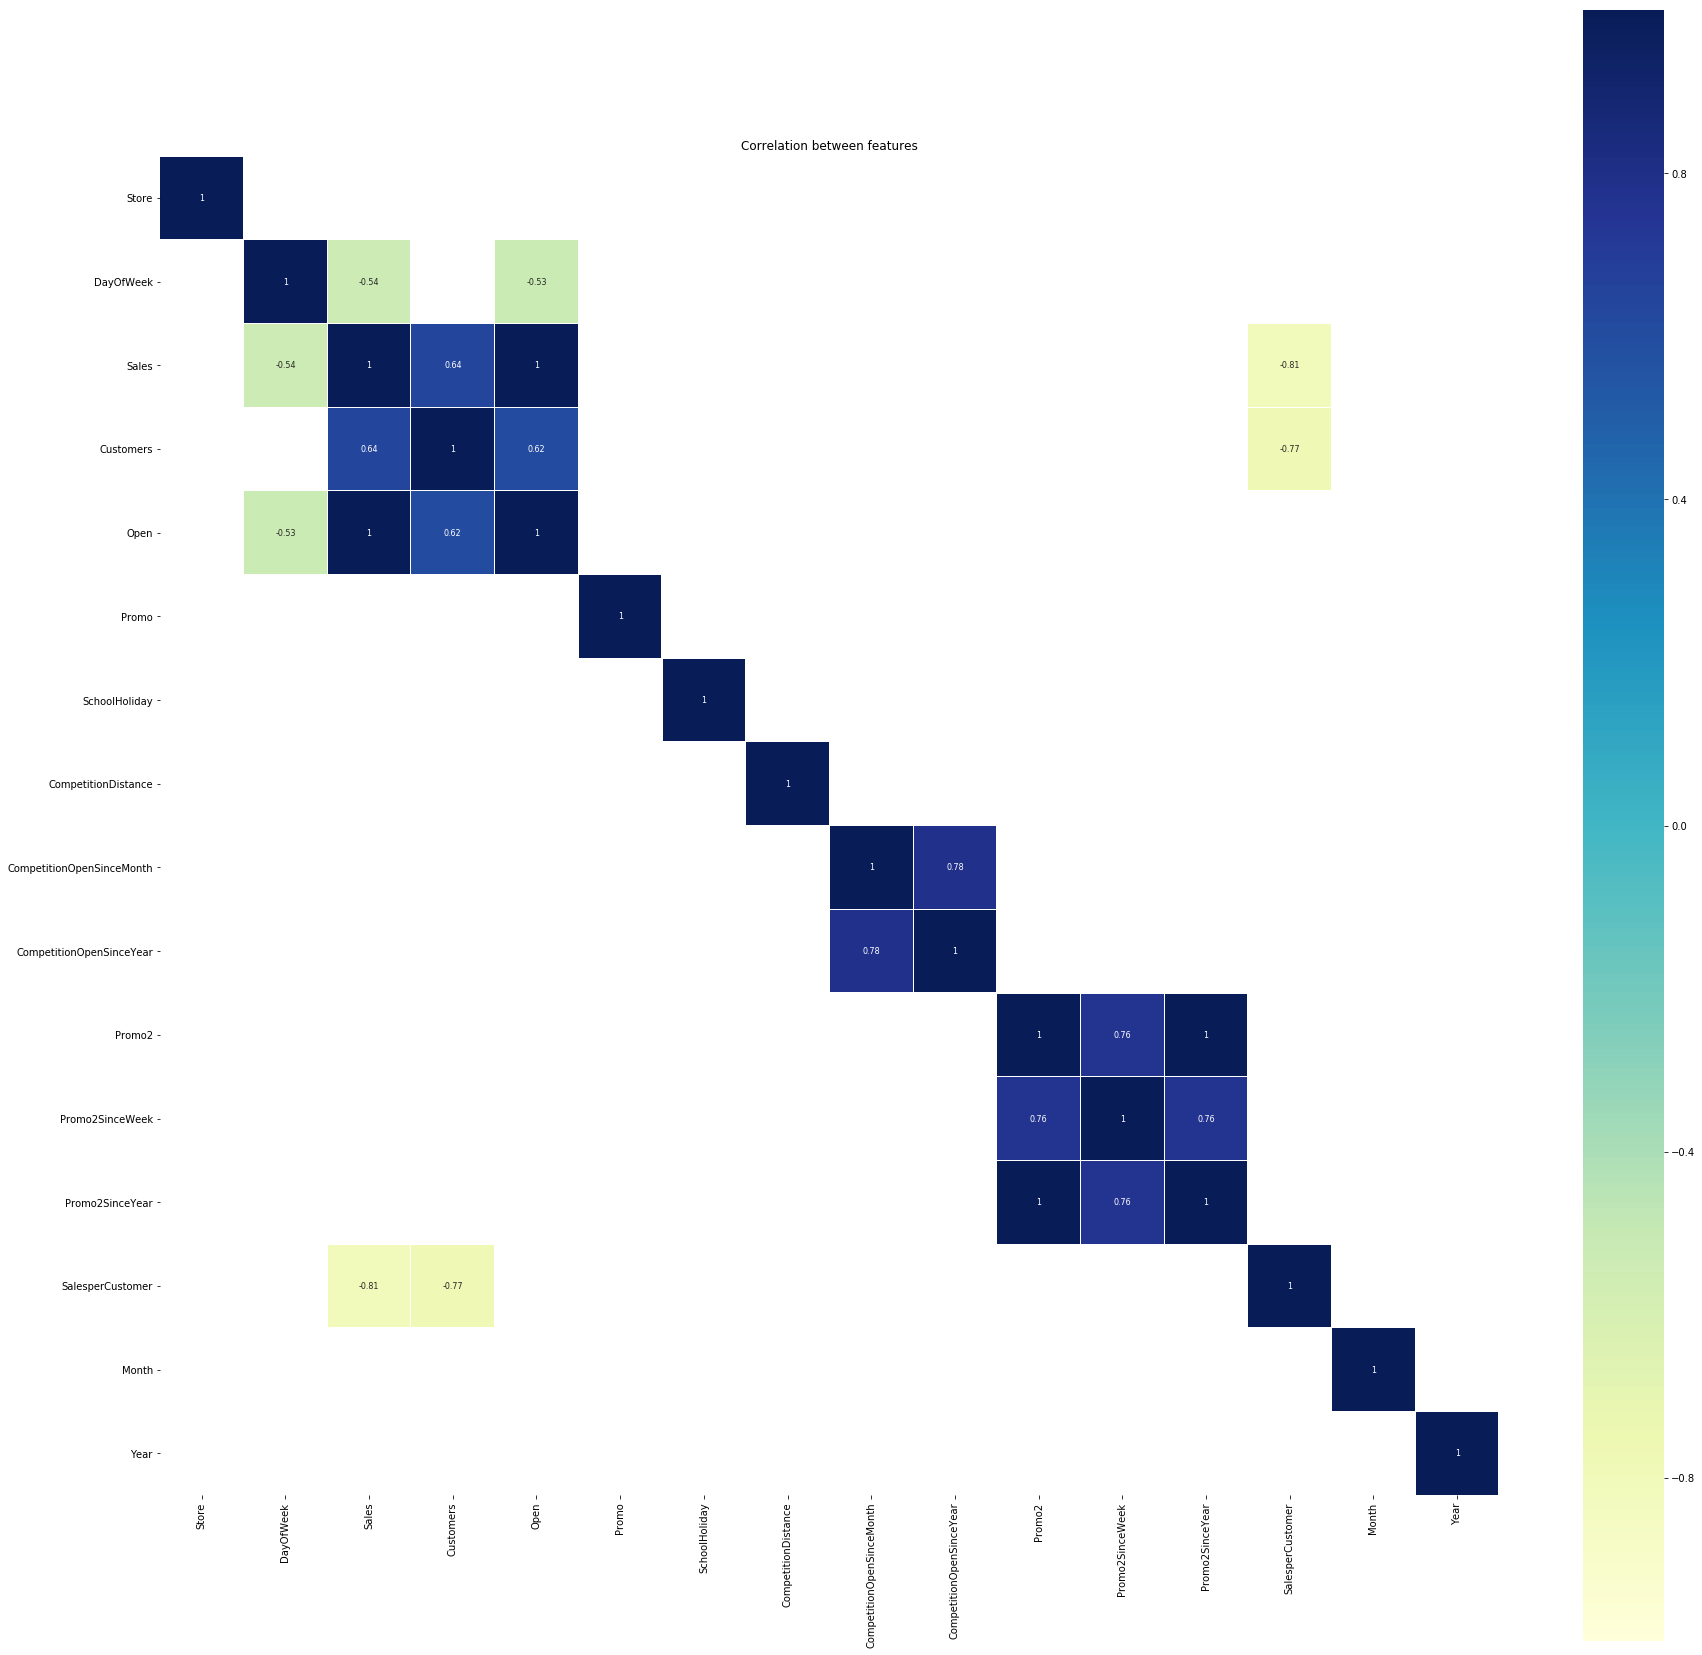

In [103]:
# Ploting correlation plot
import matplotlib.pyplot as plt
corr=train1.select_dtypes(exclude=['object', 'datetime','category']).corr()
plt.figure(figsize=(30, 30))

sns.heatmap(corr[(corr >= 0.4) | (corr <= -0.4)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.title('Correlation between features')

In [133]:
train1.head()

,Sales,Open,Promo,CompetitionDistance,Promo2,Month,Year,Sales,Open,Promo,...,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,SchoolHoliday_1
0,8.568646,1,1,7.147559,0,7,2015,8.568646,1,1,...,0,0,0,0,0,0,1,0,0,1
1,8.521384,1,1,7.147559,0,7,2015,8.521384,1,1,...,0,0,0,0,0,1,0,0,0,1
2,8.472823,1,1,7.147559,0,7,2015,8.472823,1,1,...,0,0,0,0,1,0,0,0,0,1
3,8.519590,1,1,7.147559,0,7,2015,8.519590,1,1,...,0,0,0,1,0,0,0,0,0,1
4,8.716536,1,1,7.147559,0,7,2015,8.716536,1,1,...,0,0,0,0,0,0,0,0,0,1


In [215]:
te1.shape

(41088, 12)

In [217]:
tr1.columns

Index(['DayOfWeek', 'Sales', 'Open', 'Promo', 'SchoolHoliday', 'StoreType',
       'Assortment', 'CompetitionDistance', 'Promo2', 'Promo2SinceWeek',
       'PromoInterval', 'Month', 'Year'],
      dtype='object')

In [121]:
train1= train1.drop(['CompetitionOpenSinceMonth_1.0'],1)

In [213]:
x=tr1.drop(columns="Sales")
y=tr1["Sales"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=123)

In [130]:
import statsmodels.api as sm

model1 = sm.OLS(y_train, x_train).fit()


ValueError: shapes (712046,2) and (712046,2) not aligned: 2 (dim 1) != 712046 (dim 0)

In [214]:
lr = LogisticRegression()
model_lr = lr.fit(x_train,y_train)
pred_lr = model_lr.predict(x_test)
metrics.accuracy_score(y_test,pred_lr)

ValueError: could not convert string to float: 'c'